# 05. Decision Trees

    # 05. Decision Trees  
        ## 5-1. Setup
        ## 5-2. 결정 트리 Training and visualizing
        ## 5-3. 예측하기  
            ### 5-3-1. 결정경계
        ## 5-4. Predicting classes and class probabilities(클래스 확률 추정)            
        ## 5-5. CART 훈련 알고리즘
        ## 5-6. 지니 불순도, 엔트로피
        ## 5-7. 규제 매개변수
        ## 5-8. 회귀
            ### 5-8-1. 노이즈가 섞인 2차 함수 형태에서의 회귀 트리
        ## 5-9. 불안정성
            ### 5-9-1. Sensitivity to training set details
        ## 5-10. exercise

## 5-1 Setup

In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

## 5-2. 결정 트리 Training and visualizing

In [2]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [3]:
def image_path(fig_id):
    return os.path.join("images", fig_id)

if not os.path.isdir("images"):
    os.makedirs("images")

In [4]:
from sklearn.tree import export_graphviz

export_graphviz(
        tree_clf,
        out_file=image_path("iris_tree.dot"),
        feature_names=iris.feature_names[2:],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )

In [9]:
%%bash
dot -Tpng ./images/iris_tree.dot -o ./images/iris_tree.png

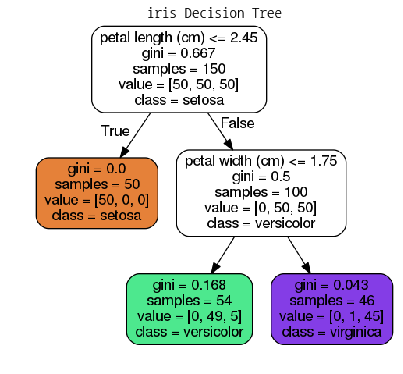

In [12]:
import matplotlib.image as mpimg

iris_tree_img = mpimg.imread("./images/iris_tree.png")
plt.figure(figsize=(12, 6))
plt.imshow(iris_tree_img)
plt.axis("off")
plt.title("iris Decision Tree")
plt.show()

## 5-3. 예측하기

새로 발견한 붓꽃의 품종을 분류하려 한다고 가정  
**지니 불순도**  
$G_{i}=1-\sum^{n}_{k=1}{{p_{i,k}}^{2}}$  

$p_{i,k}$: $i$번째 노드에 있는 훈련 샘플 중 클래스 k에 속한 샘플 비율

### 5-3-1. 결정경계

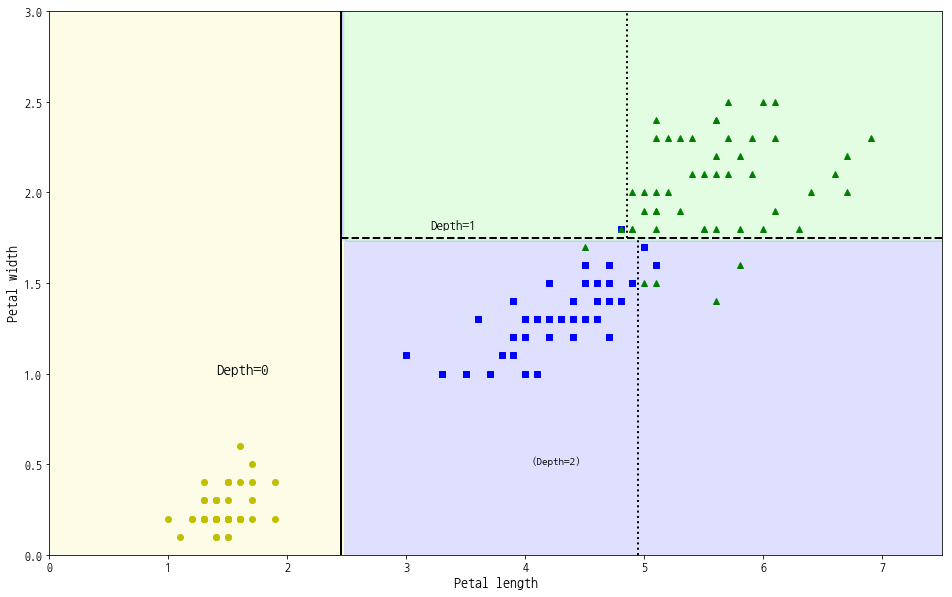

In [27]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris-Setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris-Versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris-Virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

plt.figure(figsize=(16, 10))
plot_decision_boundary(tree_clf, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)

plt.show()

* 굵은 수직선이 루트 노드(깊이 0)의 결정 경계(꽃잎 길이 = 2.45cm)를 나타냄  
* 왼쪽 영역은 순수 노드(Iris-Setosa만 있음)이기 때문에 더 이상 나눌 수 없음  
* 오른쪽 영역은 순수 노드가 아니므로 깊이 1의 오른쪽 노드는 꽃잎 너비 = 1.75cm에서 나누어짐  
* max_depth를 2로 설정했기 때문에 결정 트리는 더 분할되지 않음  
* max_depth를 3으로 하면 깊이 2의 두 노드가 각각 결정 경계를 추가로 만듬

## 5-4. Predicting classes and class probabilities(클래스 확률 추정)

결정 트리는 한 샘플이 특정 클래스 k에 속할 확률을 추정할 수도 있음  
먼저 이 샘플에 대해 리프노드를 찾기 위해 트리를 탐색하고 그 노드에 있는 클래스 k의 훈련 샘플의 비율을 반환함  
예를 들어 길이가 5cm이고 너비가 1.5cm인 꽃잎을 발견했다고 가정  
이에 해당하는 리프 노드는 깊이 2에서 왼쪽 노드이므로 결정 트리는 그에 해당하는 확률을 출력함  
Iris-Setosa는 0%(0/54), Iris-Versicolor는 90.7%(49/54), Iris-Virginica는 9.3%(5/54)임  
당연히 클래스를 하나 예측하면 가장 높은 확률을 가진 Iris-Versicolor(클래스1)을 출력할 것  

In [16]:
tree_clf.predict_proba([[5, 1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [17]:
tree_clf.predict([[5, 1.5]])

array([1])

## 5-5. CART 훈련 알고리즘

* scikit-learn은 결정 트리를 훈련시키기 위해 CART(Classification And Regression Tree)알고리즘을 사용  

___

* 먼저 훈련 세트를 하나의 특성 $k$의 임계값 $t_{k}$를 사용해 2개의 서브넷으로 나눔(꽃잎의 길이 $\le$ 2.45cm)  
* $k$와 $t_{k}$를 고르는 방법은 (크기에 따른 가중치가 적용된) 가장 순수한 서브셋으로 나눌 수 있는 ($k$, $t_{k}$)짝을 찾음  

* CART 알고리즘의 cost function  
  
$J(k, t_{k})=\frac{m_{left}}{m}G_{left}+\frac{m_{right}}{m}G_{right}$  

여기서 $\begin{cases}  G_{left\quad/\quad right} \\m_{left\quad/\quad right}  \end{cases}$  

* 훈련 세트를 성공적으로 둘로 나누었다면 같은 방식으로 서브셋을 또 나누고 그 다음엔 서브셋의 서브셋을 나누고 이런 식으로 계속 반복  
* 이 과정은 (max_depth 매개변수로 정의된)최대 깊이가 되면 중지하거나 불순도를 줄이는 분할을 찾을 수 없을 때 멈추게 됨  
* 이 문제는 **납득할만한 좋은 솔루션**으로 만족해야 함

## 5-6. 지니 불순도, 엔트로피

* DecisionTreeClassifier의 criterion 매개변수의 기본값: "gini"  
* DecisionTreeRegressor의 기본값: "mse"  
기본적으로 지니 불순도가 사용되지만 criterion 매개변수를 "entropy"로 지정하여 엔트로피 불순도를 사용할 수 있음  
어떤 세트가 한 클래스의 샘플만 담고 있다면 엔트로피가 0임  

**entropy**  
$H_{ i }=-\sum _{ k=1, p_{ i,k }\ne 0 }^{ n }{ p_{ i, k } } log_{ 2 }{ (p_{ i, k }) }$  

* 지니 불순도와 엔트로피 중 지니 불순도가 조금 더 계산이 빠르기 때문에 기본값으로 좋음  
* 다른 트리가 만들어지는 경우 지니 불순도가 가장 빈도 높은 클래스를 한쪽 가지(branch)로 고립시키는 경향이 있는 반면 엔트로피는 조금 더 균형 잡힌 트리를 만듬  

## 5-7. 규제 매개변수
* 결정 트리는 훈련 데이터에 대한 제약사항이 거의 없음(선형 모델은 데이터가 꼭 선형일 거라 가정)  
* 제한을 두지 않으면 트리가 훈련 데이터에 아주 가깝게 맞추려고 해서 대부분 과대적합이되기 쉬움  
* 결정 트리는 모델 파라미터가 전혀 없는 것이 아니라 훈련되기 전에 파라미터 수가 결정되지 않기 때문에 이런 모델을 nonparametric model이라고 부르곤 함  
* 그래서 모델 구조가 데이터에 맞춰져서 고정되지 않고 자유로음  

---

* 반대로 선형 모델 같은 parametric model은 미리 정의된 모델 파라미터 수를 가지므로 자유도가 제한되고 과대적합될 위험이 줄어듬(하지만 과소적합될 위험은 커짐)  
* 훈련 데이터에 대한 과대적합을 피하기 위해 학습할 때 결정 트리의 자유도를 제한할 필요가 있음  
* 규제 매개변수는 사용하는 알고리즘에 따라 다르지만, 결정트리의 최대 깊이는 제어할 수 있음  
* scikit-learn에서는 `max_depth`매개변수로 이를 조절(기본값은 제한이 없는 것을 의미하는 **None**) 

---

DecisionTreeClassifier에는 비슷하게 결정 트리의 형태를 제한하는 다른 매개변수가 몇개 있음  
**min_samples_split**: 분할되기 전에 노드가 가져야 하는 최소 샘플 수  
**min_samples_leaf**: 리프노드가 가지고 있어야 할 최소 샘플 수  
**min_weight_fraction_leaf**: min_samples_leaf와 같지만 가중치가 부여된 전체 샘플 수에서의 비율  
**max_leaf_nodes**: 리프 노드의 최대 수  
**max_features**: 각 노드에서 분할에 사용할 특성의 최대 수  

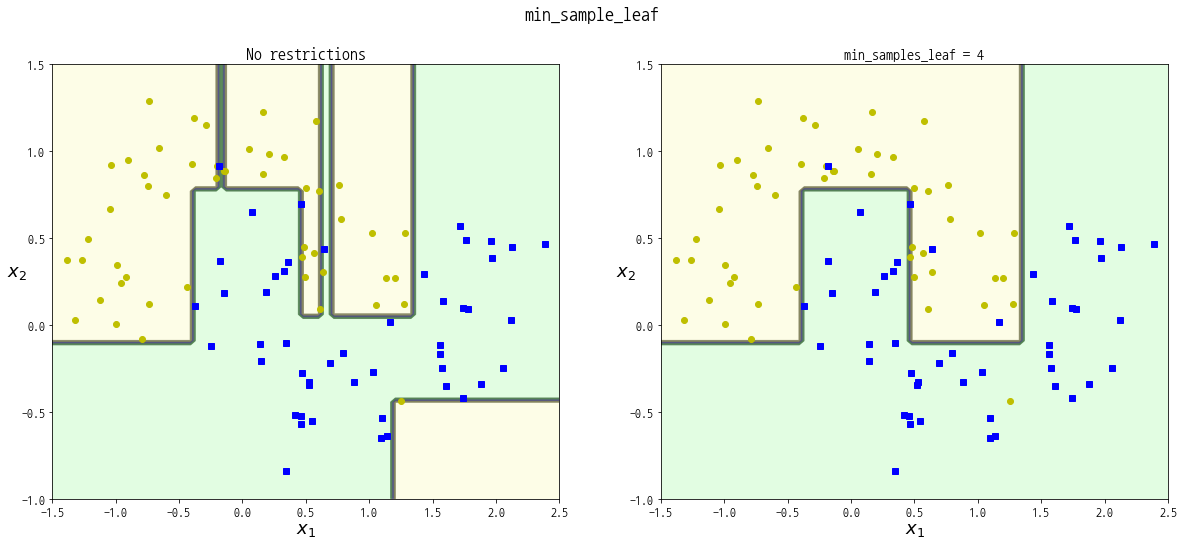

In [29]:
from sklearn.datasets import make_moons
Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=53)

deep_tree_clf1 = DecisionTreeClassifier(random_state=42)
deep_tree_clf2 = DecisionTreeClassifier(min_samples_leaf=4, random_state=42)
deep_tree_clf1.fit(Xm, ym)
deep_tree_clf2.fit(Xm, ym)

plt.figure(figsize=(20, 8)).suptitle("min_sample_leaf", fontsize=18)
plt.subplot(121)
plot_decision_boundary(deep_tree_clf1, Xm, ym, axes=[-1.5, 2.5, -1, 1.5], iris=False)
plt.title("No restrictions", fontsize=16)
plt.subplot(122)
plot_decision_boundary(deep_tree_clf2, Xm, ym, axes=[-1.5, 2.5, -1, 1.5], iris=False)
plt.title("min_samples_leaf = {}".format(deep_tree_clf2.min_samples_leaf), fontsize=14)

plt.show()

> 제한 없이 결정 트리를 훈련시키고 불필요한 노드를 가지치기(pruning)하는 알고리즘도 있음  
순도를 높이는 것이 **통계적으로 큰 효과가 없다면** 리프 노드 바로 위의 노드는 불필요할 수 있음  
대표적으로 $\chi^{2}$검정 같은 통계적 검정을 사용하여 우연히 향상된 것인지 추정  
이 확률을 p-value라 부르며 어떤 임계값(5%)보다 높으면 그 노드는 불필요한 것으로 간주되고 그 하위 노드는 삭제 됨  
가지치기는 불필요한 노드가 모두 없어질 때까지 계속됨

## 5-8. 회귀

* 결정 트리는 회귀 문제에도 사용할 수 있음  

### 5-8-1. 노이즈가 섞인 2차 함수 형태에서의 회귀 트리

In [31]:
# Quadratic training set + noise
np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10

In [41]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

In [42]:
y.shape

(200, 1)

In [43]:
X.shape

(200, 1)

In [72]:
from sklearn.tree import export_graphviz

export_graphviz(
        tree_reg,
        out_file=image_path("second_regression.dot"),
        feature_names=["x1"],
        rounded=True,
        filled=True)

In [73]:
%%bash
dot -Tpng ./images/second_regression.dot -o ./images/second_regression.png

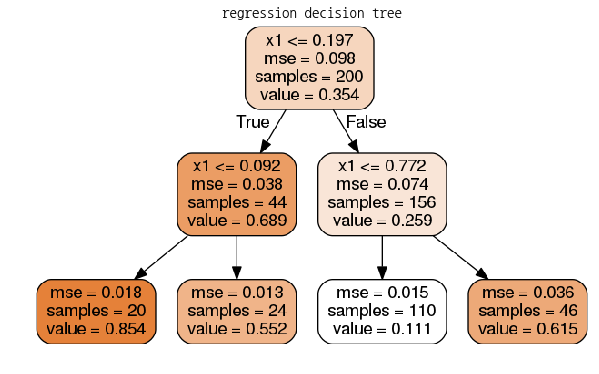

In [74]:
import matplotlib.image as mpimg

reg_img = mpimg.imread("./images/second_regression.png")
plt.figure(figsize=(12, 6))
plt.imshow(reg_img)
plt.axis("off")
plt.title("regression decision tree")
plt.show()

* 이 트리는 각 노드에서 클래스를 예측하는 대신 어떤 값을 예측함  
* 예를들어 $x_{1}=0.6$인 샘플의 클래스를 예측하면 루트 노드부터 시작해서 트리를 순회하면 결국 value=0.111인 리프 노드에 도달하게 됨  
이 리프 노드에 있는 110개 훈련 샘플의 평균 타겟값이 예측값이 됨  
* 이 예측값을 사용해 110개 샘플에 대한 평균제곱오차(MSE)를 계산하면 0.0151이 됨  

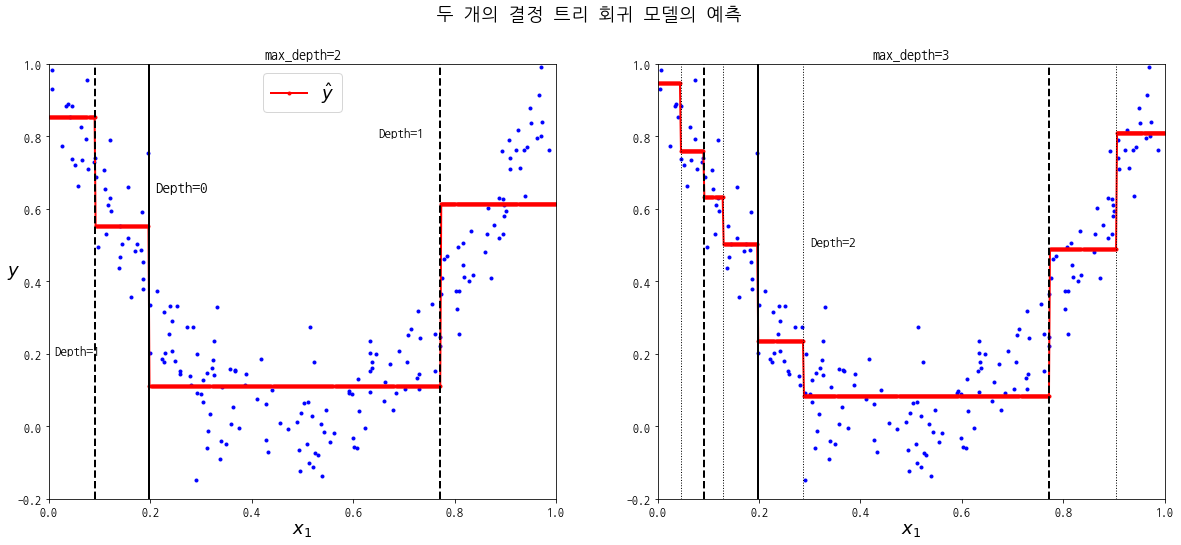

In [70]:
from sklearn.tree import DecisionTreeRegressor

tree_reg1 = DecisionTreeRegressor(random_state=42, max_depth=2)
tree_reg2 = DecisionTreeRegressor(random_state=42, max_depth=3)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

def plot_regression_predictions(tree_reg, X, y, axes=[0, 1, -0.2, 1], ylabel="$y$"):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel("$x_1$", fontsize=18)
    if ylabel:
        plt.ylabel(ylabel, fontsize=18, rotation=0)
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")

plt.figure(figsize=(20, 8)).suptitle("두 개의 결정 트리 회귀 모델의 예측", fontsize=18)
plt.subplot(121)
plot_regression_predictions(tree_reg1, X, y)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
plt.text(0.21, 0.65, "Depth=0", fontsize=15)
plt.text(0.01, 0.2, "Depth=1", fontsize=13)
plt.text(0.65, 0.8, "Depth=1", fontsize=13)
plt.legend(loc="upper center", fontsize=18)
plt.title("max_depth=2", fontsize=14)

plt.subplot(122)
plot_regression_predictions(tree_reg2, X, y, ylabel=None)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
for split in (0.0458, 0.1298, 0.2873, 0.9040):
    plt.plot([split, split], [-0.2, 1], "k:", linewidth=1)
plt.text(0.3, 0.5, "Depth=2", fontsize=13)
plt.title("max_depth=3", fontsize=14)

plt.show()

* CART 알고리즘은 훈련 세트를 불순도를 최소화하는 방향으로 분할하는 대신 MSE를 최소화하도록 분할하는 것을 제외하고 비슷하게 작동함  

**회귀를 위한 CART 비용 함수**  
$J(k,t_{ k })=\frac { m_{ left } }{ m } MSE_{ left }+\frac { m_{ right } }{ m } MSE_{ right }$  

여기서 $\begin{cases} MSE_{ node }=\sum _{ i\in node }{ \left( \hat { y } _{ node }-y^{ (i) } \right) ^{ 2 } }  \\  \hat{y}_{node}=\frac{1}{m_{node}}\sum_{i\in node}{y^{(i)}} \end{cases}$

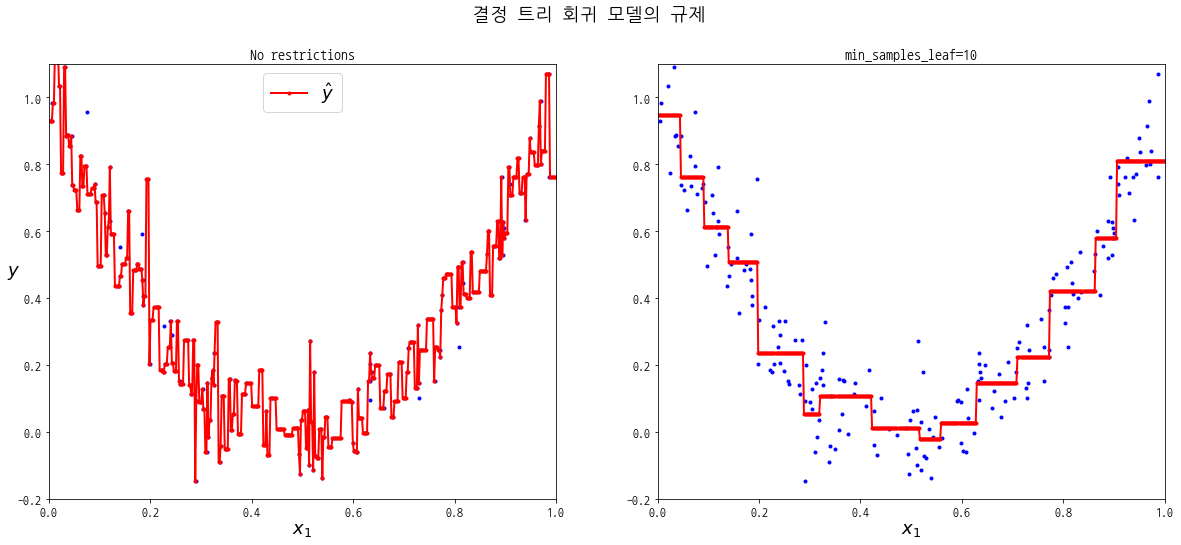

In [76]:
tree_reg1 = DecisionTreeRegressor(random_state=42)
tree_reg2 = DecisionTreeRegressor(random_state=42, min_samples_leaf=10)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

x1 = np.linspace(0, 1, 500).reshape(-1, 1)
y_pred1 = tree_reg1.predict(x1)
y_pred2 = tree_reg2.predict(x1)

plt.figure(figsize=(20, 8)).suptitle("결정 트리 회귀 모델의 규제", fontsize=18)

plt.subplot(121)
plt.plot(X, y, "b.")
plt.plot(x1, y_pred1, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", fontsize=18, rotation=0)
plt.legend(loc="upper center", fontsize=18)
plt.title("No restrictions", fontsize=14)

plt.subplot(122)
plt.plot(X, y, "b.")
plt.plot(x1, y_pred2, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.title("min_samples_leaf={}".format(tree_reg2.min_samples_leaf), fontsize=14)

plt.show()

* 규제가 없다면(기본 매개변수를 사용하면) 왼쪽과 같은 예측을 함 -> 훈련 세트에 아주 크게 과대적합됨  
* min_samples_leaf=10으로 지정하면 오른쪽 그래프처럼 모델을 만듬  

## 5-9. 불안정성

결정트리 이해하고 해석하기 쉽고 성능도 뛰어남  
결정 트리는 계단 모양의 결정 경계를 만듬(모든 분할은 축에 수직) -> 그래서 훈련 세트의 회전에 민감  
왼쪽의 결정 트리는 쉽게 데이터셋을 구분하지만, 데이터셋을 45도 회전한 오른쪽의 결정 트리는 불필요하게 구불구불해짐  
두 결정 트리 모두 훈련 세트를 완벽하게 학습하지만 오른쪽 모델은 잘 일반화되지 않음  

---

이런 문제는 PCA 기법을 사용하는 것

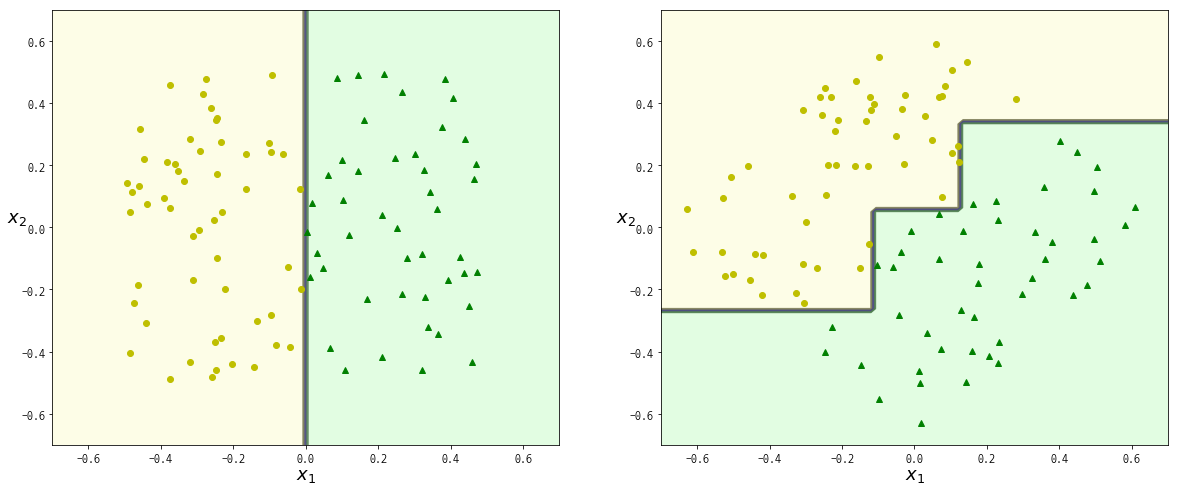

In [19]:
np.random.seed(6)
Xs = np.random.rand(100, 2) - 0.5
ys = (Xs[:, 0] > 0).astype(np.float32) * 2

angle = np.pi / 4
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
Xsr = Xs.dot(rotation_matrix)

tree_clf_s = DecisionTreeClassifier(random_state=42)
tree_clf_s.fit(Xs, ys)
tree_clf_sr = DecisionTreeClassifier(random_state=42)
tree_clf_sr.fit(Xsr, ys)

plt.figure(figsize=(20, 8))
plt.subplot(121)
plot_decision_boundary(tree_clf_s, Xs, ys, axes=[-0.7, 0.7, -0.7, 0.7], iris=False)
plt.subplot(122)
plot_decision_boundary(tree_clf_sr, Xsr, ys, axes=[-0.7, 0.7, -0.7, 0.7], iris=False)

plt.show()

### 5-9-1. Sensitivity to training set details

In [21]:
X[(X[:, 1]==X[:, 1][y==1].max()) & (y==1)] # widest Iris-Versicolor flower

array([[4.8, 1.8]])

In [22]:
not_widest_versicolor = (X[:, 1]!=1.8) | (y==2)
X_tweaked = X[not_widest_versicolor]
y_tweaked = y[not_widest_versicolor]

tree_clf_tweaked = DecisionTreeClassifier(max_depth=2, random_state=40)
tree_clf_tweaked.fit(X_tweaked, y_tweaked)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=40,
            splitter='best')

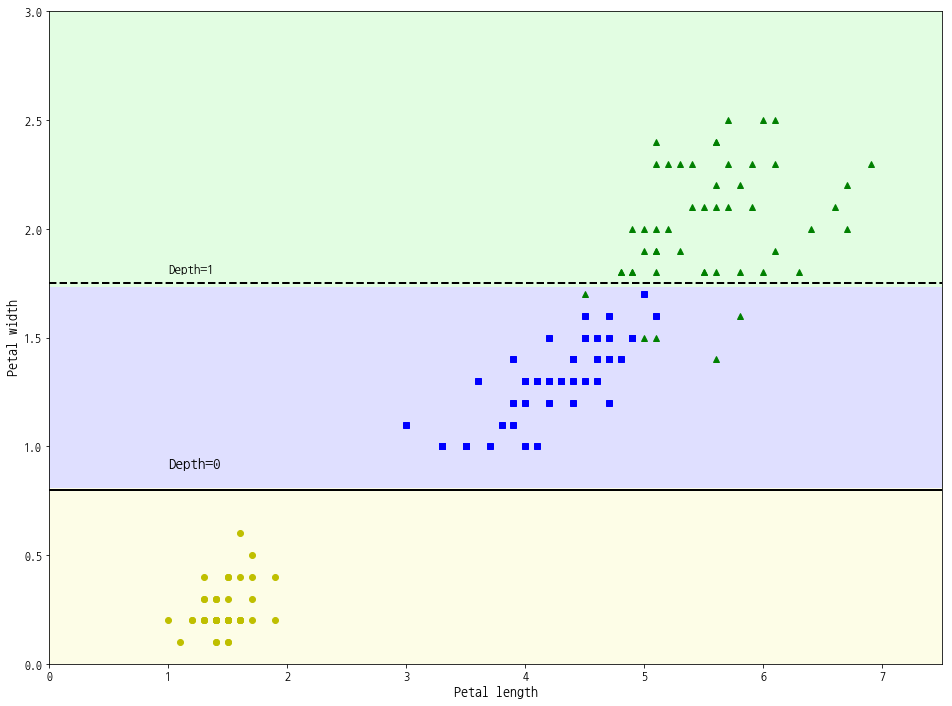

In [25]:
plt.figure(figsize=(16, 12))
plot_decision_boundary(tree_clf_tweaked, X_tweaked, y_tweaked, legend=False)
plt.plot([0, 7.5], [0.8, 0.8], "k-", linewidth=2)
plt.plot([0, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.text(1.0, 0.9, "Depth=0", fontsize=15)
plt.text(1.0, 1.80, "Depth=1", fontsize=13)

plt.show()

## 5-10. exercise

1. 백만 개의 샘플을 가진 훈련 세트에서 (규제 없이)훈련시킨 결정 트리의 깊이는 대략 얼마인가?  
2. 한 노드의 지니 불순도가 보통 그 부모 노드보다 작은가? 큰가? 일반적으로 작거나 클까? 아니면 항상 작거나 클까?
3. 결정 트리가 훈련 세트에 과대적합되었다면 max_depth를 줄이는 것이 좋은가?
4. 결정 트리가 훈련 세트에 과소적합되었다면 입력 특성의 스케일을 조정하는 것이 좋을까?
5. 백만 개의 샘플을 가진 훈련 세트에 결정 트리를 훈련시키는 데 한 시간이 걸렸다면, 천만 개의 샘플을 가진 훈련 세트에 결정 트리를 훈련시키는 데는 대략 얼마나 걸리는가?
6. 십만 개의 샘플을 가진 훈련 세트가 있다면 presort=True로 지정하는 것이 훈련 속도를 높이는가?
7. moons 데이터셋에 결정 트리를 훈련시키고 세밀하게 튜닝
    a. make_moons(n_samples=1000, noise=0.4)를 사용해 데이터셋을 생성  
    b. 이를 train_test_split()을 사용해 훈련 세트와 테스트 세트로 나눔  
    c. DecisionTreeClassifier의 최적의 매개변수를 찾기 위해 교차 검증과 함께 그리드 탐색을 수행(GridSearchCV를 사용): max_leaf_nodes값을 시도
    d. 찾은 매개변수를 사용해 전체 훈련 세트에 대해 모델을 훈련시키고 테스트 세트에서 성능을 측정(대량 85~87%의 정확도가 나옴)  
8. 랜덤 포레스트를 만들어보라
    a. 이전 문제에 있어서, 훈련 세트의 서브셋을 1,000개 생성, 각각의 무작위로 선택된 100개의 샘플을 담고 있음(scikit-learn의 ShuffleSplit을 사용할 수 있음)  
    b. 앞에서 찾은 최적의 매개변수를 사용해 각 서브셋에 결정 트리를 훈련시킴. 더 작은 데이터셋에서 훈련되었기 때문에 이 결정 트리는 앞서 만든 결정 트리보다 성능이 떨어져 약 80%의 정확도를 냄  
    c. 각 테스트 샘플에 대해 1,000개의 결정 트리 예측을 만들고 다수로 나온 예측만 취함(scipy의 mode()함수를 사용할 수 있음) -> 테스트 세트에 대한 majority-vote prediction이 만들어짐  
    d. 테스트 세트에서 이 예측을 평가(앞서 만든 모델보다 조금 높은 정확도를 얻게 됨)

## 1. to 6.

See appendix A.

## 7.

_Exercise: train and fine-tune a Decision Tree for the moons dataset._

a. Generate a moons dataset using `make_moons(n_samples=10000, noise=0.4)`.

Adding `random_state=42` to make this notebook's output constant:

In [23]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=10000, noise=0.4, random_state=42)

b. Split it into a training set and a test set using `train_test_split()`.

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

c. Use grid search with cross-validation (with the help of the `GridSearchCV` class) to find good hyperparameter values for a `DecisionTreeClassifier`. Hint: try various values for `max_leaf_nodes`.

In [25]:
from sklearn.model_selection import GridSearchCV

params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, n_jobs=-1, verbose=1, cv=3)

grid_search_cv.fit(X_train, y_train)

Fitting 3 folds for each of 294 candidates, totalling 882 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 322 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 882 out of 882 | elapsed:    3.7s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99], 'min_samples_split': [2, 3, 4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       s

In [26]:
grid_search_cv.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=17,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

d. Train it on the full training set using these hyperparameters, and measure your model's performance on the test set. You should get roughly 85% to 87% accuracy.

By default, `GridSearchCV` trains the best model found on the whole training set (you can change this by setting `refit=False`), so we don't need to do it again. We can simply evaluate the model's accuracy:

In [27]:
from sklearn.metrics import accuracy_score

y_pred = grid_search_cv.predict(X_test)
accuracy_score(y_test, y_pred)

0.8695

## 8.

_Exercise: Grow a forest._

a. Continuing the previous exercise, generate 1,000 subsets of the training set, each containing 100 instances selected randomly. Hint: you can use Scikit-Learn's `ShuffleSplit` class for this.

In [28]:
from sklearn.model_selection import ShuffleSplit

n_trees = 1000
n_instances = 100

mini_sets = []

rs = ShuffleSplit(n_splits=n_trees, test_size=len(X_train) - n_instances, random_state=42)
for mini_train_index, mini_test_index in rs.split(X_train):
    X_mini_train = X_train[mini_train_index]
    y_mini_train = y_train[mini_train_index]
    mini_sets.append((X_mini_train, y_mini_train))

b. Train one Decision Tree on each subset, using the best hyperparameter values found above. Evaluate these 1,000 Decision Trees on the test set. Since they were trained on smaller sets, these Decision Trees will likely perform worse than the first Decision Tree, achieving only about 80% accuracy.

In [29]:
from sklearn.base import clone

forest = [clone(grid_search_cv.best_estimator_) for _ in range(n_trees)]

accuracy_scores = []

for tree, (X_mini_train, y_mini_train) in zip(forest, mini_sets):
    tree.fit(X_mini_train, y_mini_train)
    
    y_pred = tree.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))

np.mean(accuracy_scores)

0.8054499999999999

c. Now comes the magic. For each test set instance, generate the predictions of the 1,000 Decision Trees, and keep only the most frequent prediction (you can use SciPy's `mode()` function for this). This gives you _majority-vote predictions_ over the test set.

In [30]:
Y_pred = np.empty([n_trees, len(X_test)], dtype=np.uint8)

for tree_index, tree in enumerate(forest):
    Y_pred[tree_index] = tree.predict(X_test)

In [31]:
from scipy.stats import mode

y_pred_majority_votes, n_votes = mode(Y_pred, axis=0)

d. Evaluate these predictions on the test set: you should obtain a slightly higher accuracy than your first model (about 0.5 to 1.5% higher). Congratulations, you have trained a Random Forest classifier!

In [32]:
accuracy_score(y_test, y_pred_majority_votes.reshape([-1]))

0.872